# Monte Carlo price simulation

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("afh-moneypl-1583659392916.csv",
                 index_col="Data", parse_dates=True)
df.head()

,Otwarcie,Zamknięcie,Maks.,Min.,Obrót (mln. zł),Zmiana (%)
Data,,,,,,
2020-03-06,11.4,10.4,11.5,10.3,0.03,0.00
2020-03-06,11.4,10.4,11.5,10.3,0.03,-9.57
2020-03-05,10.0,11.5,12.0,10.0,0.01,0.88
2020-03-04,11.1,11.4,11.9,10.4,0.02,-9.52
2020-03-03,12.0,12.6,12.8,11.0,0.01,-1.56


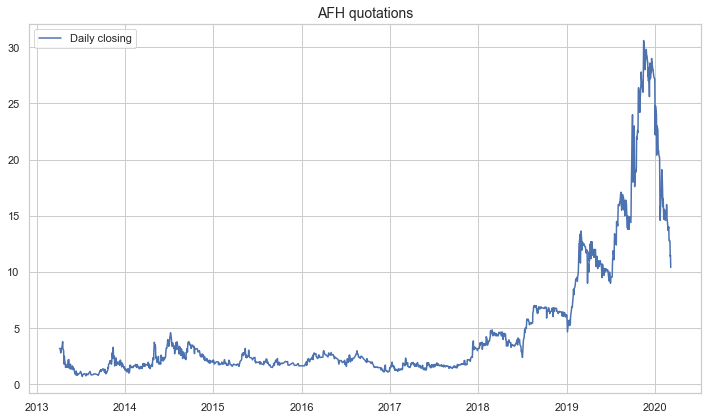

In [22]:
fig = plt.figure(figsize=(10, 6))
plt.plot(df["Zamknięcie"])
plt.plot(df["Zamknięcie"].resample("M").mean(), linestyle="dashed")
plt.title("AFH quotations", size=14)
plt.legend(["Daily closing", "Rolling mothly mean"])
plt.tight_layout()
plt.show()

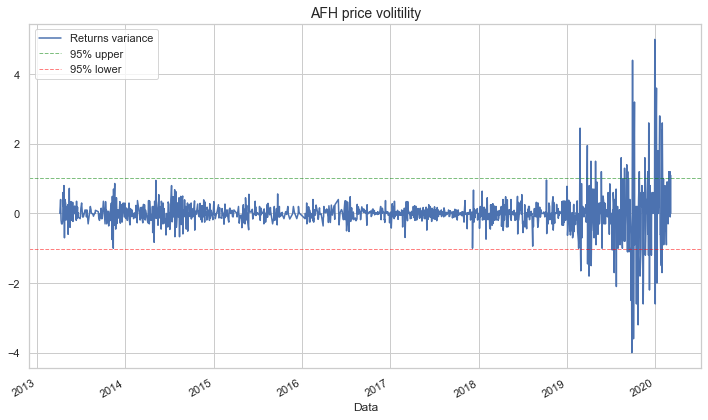

In [26]:
# detrending by differencing to catch volatity
fig = plt.figure(figsize=(10, 6))

# plotting
df["Zamknięcie"].diff().plot()

# 95% confidence interval bounaries
plt.axhline(1.96*df["Zamknięcie"].diff().std(),
            linestyle="dashed", lw=1, color="green", alpha=0.5)
plt.axhline(-1.96*df["Zamknięcie"].diff().std(),
            linestyle="dashed", lw=1, color="red", alpha=0.5)
plt.title("AFH price volitility", size=14)
plt.legend(["Returns variance", "95% upper", "95% lower"])

plt.tight_layout()
plt.show()

In [5]:
afh_average_returns = (df["Zmiana (%)"]/100).mean()
afh_var = (df["Zmiana (%)"]/100).var()
afh_std = (df["Zmiana (%)"]/100).std()
print(f"Average return rate: {afh_average_returns.round(3)}",
      f"variance: {afh_var.round(3)}", f"Standard deviation: {afh_std.round(3)}")

Average return rate: 0.005 variance: 0.008 Standard deviation: 0.088


In [7]:
def sim(days_ahead):

    initial_price = df.iloc[0, 1]
    price = [initial_price]

    # expected rate of change each day
    # other solution risk free rate - (var/2) or simply zero
    afh_drift = afh_average_returns - (afh_var/2)

    for d in range(days_ahead):
        afh_today_price = price[-1] * \
            (1 + afh_drift + afh_std * np.random.normal())
        price.append(afh_today_price)

    return price

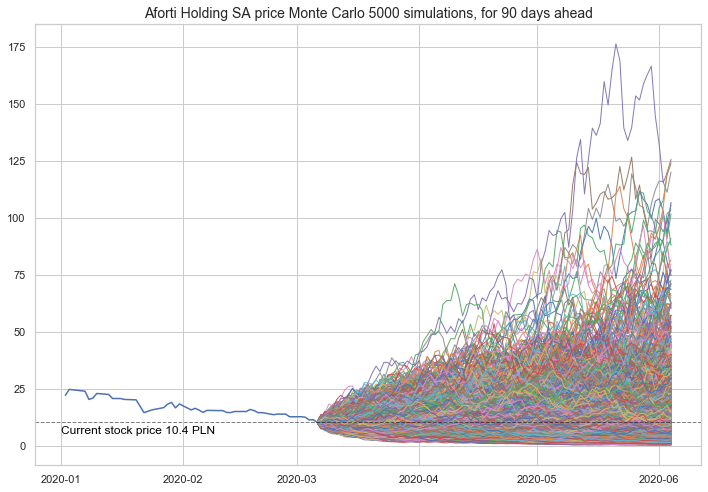

In [38]:
days_ahead = 90
simulations = 5000

days_ahead_index = pd.date_range(
    start=df.index[0], periods=days_ahead+1, freq="D")

fig = plt.figure(figsize=(10, 7))

plt.plot(df[df.index > "2019-12-31"]["Zamknięcie"])
for i in range(simulations):
    plt.plot(pd.DataFrame(data=sim(days_ahead), index=days_ahead_index), lw=1, alpha=0.95)
plt.title(
    f"Aforti Holding SA price Monte Carlo {simulations} simulations, for {days_ahead} days ahead", size=14)
plt.axhline(df.iloc[0, 1], linestyle="dashed",
            color="black", alpha=0.5, lw=1)
plt.annotate(f"Current stock price {df.iloc[0,1]} PLN", xy=(
    pd.datetime(2020, 1, 1), df.iloc[0, 1]-5), color="black")

plt.tight_layout()
plt.show()